# I. Import the Dataset

### Step 1. Import the necessary libraries

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Step 2. Load the digits.csv dataset 
This is a copy of the test set of the UCI ML hand-written digits datasets https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

Each datapoint is a 8x8 image of a digit, Classes=10, Samples per class~180, 

Samples total=1797, Dimensionality=64, and Features=(integers 0-16)


- After importing this dataset, split it into test and train sets. 
- You may check the shape of data and the target attributes of the dataset. 
- You may also want to print a few samples from the dataset.

In [19]:
df = pd.read_csv('digits.csv')

In [20]:
df.shape

(1797, 65)

In [21]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,y
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [22]:
print(df.columns)

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'y'],
      dtype='object')


In [27]:
from sklearn.model_selection import train_test_split
y = df['y']
X = df.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# II. Cross-validation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. 

When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

A model is trained using  of the folds as training data; the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.
(Check https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

### Step 1. Import libraries
Import the classes `cross_val_score` and `KNeighborsClassifier` 

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

### Step 2. Run cross validation
Run cross validation for `cv=5` on the train dataset. Print the scores.

In [29]:
# initialize KNeighborsClassifier and perform cross validation where cv=5
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, cv=5)

In [30]:
print("\nCV scores:", scores)


CV scores: [0.99652778 0.97916667 0.97909408 0.98954704 0.97212544]


### Step 3: Print the mean score and confidence interval
Print the mean score of cross validation with 95% confidence interval.

In [42]:
# 95% confidence has a z score of ~1.96
# Margin of error = z-score * std error
margin_of_error = 1.96 * scores.std()

print(f"mean score: {scores.mean()}")
print(f"95% confidence interval: ({scores.mean() - margin_of_error}, {scores.mean() + margin_of_error})")

mean score: 0.9832921989934185
95% confidence interval: (0.966348808631685, 1.000235589355152)


### Step 4. Repeat Step 3 for  KFold, StratifiedKFold
Repeat Step 3 for `KFold`, `StratifiedKFold` with number of splits `n_splits=10`. Print the mean score with 95% confidence interval.

In [44]:
from sklearn.model_selection import KFold, StratifiedKFold

# calculate for KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
scores_kf = cross_val_score(knn, X_train, y_train, cv=kf)
margin_of_error = 1.96 * scores_kf.std()

print(f"mean score: {scores_kf.mean()}")
print(f"95% confidence interval: ({scores_kf.mean() - margin_of_error}, {scores_kf.mean() + margin_of_error})")

# calculate for StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
scores_skf = cross_val_score(knn, X_train, y_train, cv=skf)
margin_of_error = 1.96 * scores_skf.std()

print(f"mean score: {scores_skf.mean()}")
print(f"95% confidence interval: ({scores_skf.mean() - margin_of_error}, {scores_skf.mean() + margin_of_error})")

mean score: 0.9832847707847708
95% confidence interval: (0.9601772358708534, 1.0063923056986883)
mean score: 0.9853826728826729
95% confidence interval: (0.9711509172684354, 0.9996144284969104)


Grid Searches
=================
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

See (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Step 1. Grid-Search with build-in cross validation
Import `GridSearchCV` from `sklearn.model_selection` and `SVC` from `sklearn.svm`

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

### Step 2: Define parameter grid:
- `SVC` has two parameters `C` and `gamma`. 
- Do not worry about the roles of these two parameters on the algorithm. 
- Set model parameters to `'C': array([  0.001, 0.01,0.1,1,10,100])` and `gamma': array([0.00001,0.0001,0.001, 0.01, 0.1])`.
- There are different ways of assigning parameter values, your instructor will lead you.

In [46]:
param_grid = {'C': np.array([0.001, 0.01, 0.1, 1, 10, 100]),
              'gamma': np.array([0.00001, 0.0001, 0.001, 0.01, 0.1])}

### Step 3. Instintiate the grid search object
Instintiate a grid search object for `SVC`, for the corresponding paranmeters with 5-folds cross validation.

In [47]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

### Step 4. Fit the grid search object on the train data set
A GridSearchCV object behaves just like a normal classifier.

In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01])})

### Step 5. Grid Search Results
- Form a data frame from the grid search results.
- Print the first 10 predictions of `X_test` using the grid search model.
- Print the best parameter, best score and estimator of the grid search.
- Create a heat map for the grid search parameters using the parameter values and the grid search results.


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.103335      0.005910         0.057419        0.002607    0.001   
1       0.094224      0.000596         0.052897        0.003124    0.001   
2       0.094107      0.000325         0.053925        0.003840    0.001   
3       0.098579      0.007615         0.055679        0.003680    0.001   
4       0.103125      0.010830         0.057242        0.006841    0.001   

   param_gamma                         params  split0_test_score  \
0      0.00001   {'C': 0.001, 'gamma': 1e-05}           0.107639   
1      0.00010  {'C': 0.001, 'gamma': 0.0001}           0.107639   
2      0.00100   {'C': 0.001, 'gamma': 0.001}           0.107639   
3      0.01000    {'C': 0.001, 'gamma': 0.01}           0.107639   
4      0.10000     {'C': 0.001, 'gamma': 0.1}           0.107639   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.107639           0.108014           0.1

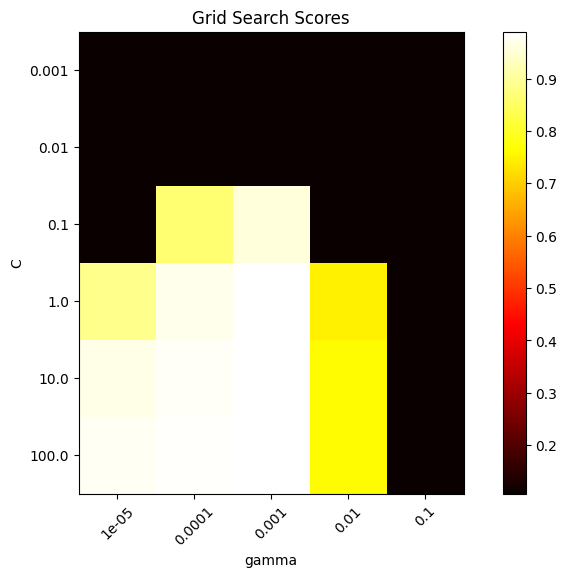

In [49]:
# create dataframe of grid search results
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df.head())

# first 10 predictions of X_test
predictions = grid_search.predict(X_test)
print("first 10 predictions of X_test:", predictions[:10])

# best param, best score, and best estimator of grid search
print("best parameter:", grid_search.best_params_)
print("best score:", grid_search.best_score_)
print("best estimator:", grid_search.best_estimator_)

# make heat map
scores = np.array(results_df.mean_test_score).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.figure(figsize=(10, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.title('Grid Search Scores')
plt.show()